In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd



In [5]:
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
1,0,-0.00200,300,7000,9000,532.25
2,0,-0.00199,300,7000,9000,536.47
3,0,-0.00198,300,7000,9000,540.69
4,0,-0.00197,300,7000,9000,544.90
5,0,-0.00196,300,7000,9000,549.09
...,...,...,...,...,...,...
120997,300,0.00196,300,7000,9000,422.17
120998,300,0.00197,300,7000,9000,422.04
120999,300,0.00198,300,7000,9000,421.90
121000,300,0.00199,300,7000,9000,421.76


In [6]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
1,0,-0.00200,532.25
2,0,-0.00199,536.47
3,0,-0.00198,540.69
4,0,-0.00197,544.90
5,0,-0.00196,549.09
...,...,...,...
120997,300,0.00196,422.17
120998,300,0.00197,422.04
120999,300,0.00198,421.90
121000,300,0.00199,421.76


In [7]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

        X-Koordinate  Y-Koordinate  Temperatur
85427            212       0.00002      789.97
6977              17      -0.00058      896.26
101558           252       0.00053      731.63
22333             55       0.00022      900.43
13974             34       0.00105      791.90
...              ...           ...         ...
110269           274      -0.00080      697.25
119880           298      -0.00117      652.65
103695           257       0.00180      637.77
861                2      -0.00144      737.98
15796             39      -0.00083      868.79

[121001 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,212,0.00002,789.97
1,17,-0.00058,896.26
2,252,0.00053,731.63
3,55,0.00022,900.43
4,34,0.00105,791.90
...,...,...,...
120996,274,-0.00080,697.25
120997,298,-0.00117,652.65
120998,257,0.00180,637.77
120999,2,-0.00144,737.98


In [13]:
label = df_min_max_scaled["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_min_max_scaled.drop("Temperatur", axis=1)
X = df1
y = label


In [14]:
X

,X-Koordinate,Y-Koordinate
0,0.706667,0.5050
1,0.056667,0.3550
2,0.840000,0.6325
3,0.183333,0.5550
4,0.113333,0.7625
...,...,...
120996,0.913333,0.3000
120997,0.993333,0.2075
120998,0.856667,0.9500
120999,0.006667,0.1400


In [15]:
y

0         0.864234
1         0.980516
2         0.800409
3         0.985078
4         0.866345
            ...   
120996    0.762797
120997    0.714004
120998    0.697726
120999    0.807356
121000    0.950463
Name: Temperatur, Length: 121001, dtype: float64

In [37]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [39]:
scaler_minmax = MinMaxScaler()
scaler_minmax2 = MinMaxScaler() 
scaler_minmax.fit_transform(X_train, y_train)
scaler_minmax2.fit_transform(X_test, y_test)
 

# Z-Score-Normalisierung
#scaler_standard = StandardScaler()
#df_z_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


,X-Koordinate,Y-Koordinate
94235,0.486667,0.7575
89243,0.066667,0.4075
21452,0.483333,0.2000
66873,0.733333,1.0000
30913,0.710000,0.3075
...,...,...
110268,0.196667,0.1275
119879,0.043333,0.0350
103694,0.273333,0.7450
860,0.363333,0.6400


In [31]:
model = Sequential()
model.add(Dense(124, activation='relu', input_dim=2))  # Eingabeschicht mit 2 Features
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# Eine versteckte Schicht
model.add(Dense(1))  # Ausgabeschicht für die Temperaturvorhersage


In [32]:
# Lernplan erstellen
initial_learning_rate = 0.02
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
 #   initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [34]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=18, batch_size=32, verbose=1)


Epoch 1/18
2420/2420 [==============================] - 3s 1ms/step - loss: 0.0065 - mean_absolute_error: 0.0283 - val_loss: 0.0027 - val_mean_absolute_error: 0.0137
Epoch 2/18
2420/2420 [==============================] - 2s 963us/step - loss: 0.0026 - mean_absolute_error: 0.0164 - val_loss: 0.0026 - val_mean_absolute_error: 0.0099
Epoch 3/18
2420/2420 [==============================] - 2s 957us/step - loss: 0.0026 - mean_absolute_error: 0.0153 - val_loss: 0.0027 - val_mean_absolute_error: 0.0156
Epoch 4/18
2420/2420 [==============================] - 2s 957us/step - loss: 0.0025 - mean_absolute_error: 0.0151 - val_loss: 0.0026 - val_mean_absolute_error: 0.0128
Epoch 5/18
2420/2420 [==============================] - 2s 940us/step - loss: 0.0025 - mean_absolute_error: 0.0143 - val_loss: 0.0024 - val_mean_absolute_error: 0.0088
Epoch 6/18
2420/2420 [==============================] - 2s 930us/step - loss: 0.0025 - mean_absolute_error: 0.0136 - val_loss: 0.0027 - val_mean_absolute_error: 0

In [35]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MAE: {test_mae}')


Test MAE: 0.012277033179998398


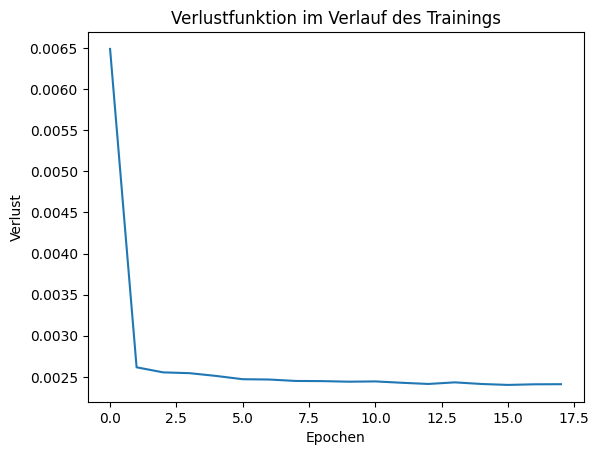

In [36]:
# Plot erstellen
loss_values = history.history['loss']
plt.plot(loss_values)
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.title('Verlustfunktion im Verlauf des Trainings')
plt.show()

In [42]:
scaled_predicted_values = model.predict(X_test)


757/757 [==============================] - 1s 685us/step


In [47]:
# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_minmax.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_minmax2.inverse_transform(y_test)  # y_test sind die skalierten tatsächlichen Werte
print(original_predicted_values)
print(original_predicted_values)
# Vergleichen Sie die Vorhersagen mit den tatsächlichen Werten
for i in range(len(original_predicted_values)):
    print("Vorhergesagter Wert:", original_predicted_values[i])
    print("Tatsächlicher Wert:", original_actual_values[i][0])
    print()

ValueError: non-broadcastable output operand with shape (24201,1) doesn't match the broadcast shape (24201,2)